In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import math
from plotly.offline import iplot


Exercise 1 - numbers

In [ ]:
print(3.141592653589793 * 2.718281828459045)

8.539734222673566


In [ ]:
1.001 ** (5000)

148.0428361625591

In [ ]:
1.001 ** (19000)

176795866.53808445

Exercise 2 - Lists

In [ ]:
x =  1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 

for i in x:
    print(2**i)
  

2
4
8
16
32
64
128
256
512
1024
2048
4096


Exercise 3 :Write python code to print '123' once, twice, three times and four times

In [ ]:
for i in range(5):
    print('123'* i)


123
123123
123123123
123123123123


In [ ]:
data = pd.DataFrame(columns = ['source', 'text', 'created_at', 'retweet_count', 'favorite_count','is_retweet', 'id_str'])

In [ ]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str


In [ ]:
filename = 'https://raw.githubusercontent.com/gorefbitim/nlp/master/data/trump_20200530.csv'
data = pd.read_csv(filename)

In [ ]:
data.columns

Index(['source', 'text', 'created_at', 'retweet_count', 'favorite_count',
       'is_retweet', 'id_str'],
      dtype='object')

In [ ]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,RT @ScottAdamsSays: Malaria drug and zinc the ...,05-30-2020 03:26:31,10566,0,True,1266571665204527109
1,Twitter for iPhone,RT @YoungDems4Trump: In Democrat cities you ca...,05-30-2020 03:21:41,22320,0,True,1266570449431003138
2,Twitter for iPhone,RT @YoungDems4Trump: So sad. This poor busines...,05-30-2020 03:21:32,23961,0,True,1266570411678019584
3,Twitter for iPhone,Time for a change! #2020 https://t.co/AECy2GBfys,05-30-2020 03:20:18,42879,164022,False,1266570099454103553
4,Twitter for iPhone,RT @TallahForTrump: Trump spoke at my church i...,05-30-2020 03:19:01,36563,0,True,1266569778770182151


In [ ]:
%%time
filename = 'https://idcds.s3.amazonaws.com/covid_tweets_mar_1_2020.csv'
# filename = 'data/covid_tweets_mar_1_2020.csv'
covid = pd.read_csv(filename)

CPU times: user 1.11 s, sys: 199 ms, total: 1.31 s
Wall time: 2.56 s


In [ ]:
covid.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,country,state,county,us_state_code
0,0,0,1234162948509028352,hu,NaN,Somogy,NaN
1,1,1,1234162952309219328,fr,Auvergne-Rhône-Alpes,Thonon-les-Bains,NaN
2,2,2,1234162953064189952,us,Ohio,Stark County,OH
3,3,3,1234162960517472256,hu,NaN,Somogy,NaN
4,4,4,1234162970797670400,fr,Bourgogne-Franche-Comté,Avallon,NaN



5. Pandas Vector Operations


In [ ]:
data.iloc[0].text 

'RT @ScottAdamsSays: Malaria drug and zinc the missing link https://t.co/FC9CpuH0Yr via @theconwom'

In [ ]:
len('RT @ScottAdamsSays: Malaria drug and zinc the missing link https://t.co/FC9CpuH0Yr via @theconwom')

97

In [ ]:
data['l'] = data.text.str.len()

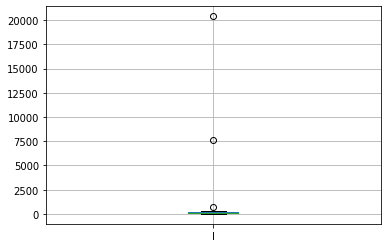

In [ ]:
data.boxplot('l')

In [ ]:
data.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,l
0,Twitter for iPhone,RT @ScottAdamsSays: Malaria drug and zinc the ...,05-30-2020 03:26:31,10566,0,True,1266571665204527109,97
1,Twitter for iPhone,RT @YoungDems4Trump: In Democrat cities you ca...,05-30-2020 03:21:41,22320,0,True,1266570449431003138,138
2,Twitter for iPhone,RT @YoungDems4Trump: So sad. This poor busines...,05-30-2020 03:21:32,23961,0,True,1266570411678019584,121
3,Twitter for iPhone,Time for a change! #2020 https://t.co/AECy2GBfys,05-30-2020 03:20:18,42879,164022,False,1266570099454103553,48
4,Twitter for iPhone,RT @TallahForTrump: Trump spoke at my church i...,05-30-2020 03:19:01,36563,0,True,1266569778770182151,140


In [ ]:
data_c = data[data.l<2500]

In [ ]:
print(data.l.mean(),   data.l.std())
print(data_c.l.mean(), data_c.l.std())

156.26257648778903 176.16996905453425
154.7624153804495 76.30339307282246


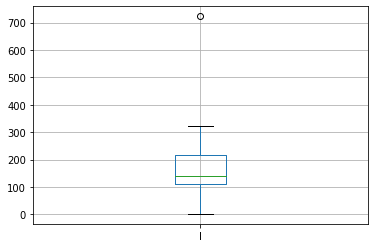

In [ ]:
data_c.boxplot('l')

In [ ]:
data.l.sum()

2885701

**Exercise 4: use for loop to travse data.is_retweet and count the number of is_retweets**

In [ ]:
c = 0
for x in data.is_retweet == True:
    if x:
        c = c +  data.is_retweet
print(c)

0        1900
1        1900
2        1900
3           0
4        1900
         ... 
18462       0
18463       0
18464       0
18465       0
18466       0
Name: is_retweet, Length: 18467, dtype: object


**6. Simple Visualisation**

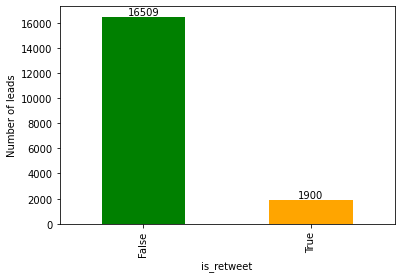

In [ ]:
f = 'is_retweet'

y = data[f].value_counts()
y.plot(kind='bar', color=['green', 'orange', 'purple'], xlabel=f, ylabel="Number of leads")

for i,v in enumerate(y):
    plt.annotate(v, xy=(i,v), ha='center', va='bottom')

In [ ]:
covid

,Unnamed: 0,Unnamed: 0.1,tweet_id,country,state,county,us_state_code
0,0,0,1234162948509028352,hu,NaN,Somogy,NaN
1,1,1,1234162952309219328,fr,Auvergne-Rhône-Alpes,Thonon-les-Bains,NaN
2,2,2,1234162953064189952,us,Ohio,Stark County,OH
3,3,3,1234162960517472256,hu,NaN,Somogy,NaN
4,4,4,1234162970797670400,fr,Bourgogne-Franche-Comté,Avallon,NaN
...,...,...,...,...,...,...,...
1429468,1429468,1429468,1233983610899849216,cm,Centre,Nyong-et-Kéllé,NaN
1429469,1429469,1429469,1233983611000348672,NaN,NaN,NaN,NaN
1429470,1429470,1429470,1233983620290883584,us,"Washington, D.C.",Washington,NaN
1429471,1429471,1429471,1233983613772935168,gb,England,East Sussex,NaN


In [ ]:
locations  = dict(covid[covid.country=='us'].groupby(['us_state_code']).state.count())

In [ ]:
map_data = dict(type='choropleth',
            locations=list(locations.keys()),
            locationmode='USA-states',
            colorscale='Portland',
            z=list(locations.values()),
            colorbar=dict(title="USA States")
           )
map_layout = dict(geo = {'scope':'usa'})
map_actual = go.Figure(data=[map_data], layout=map_layout)
iplot(map_actual)


Exercise 5: Found the populations in the 52, and normalize the number of tweets by population

In [ ]:
print(len(locations.keys()))

52


In [ ]:
locations

{'AK': 416,
 'AL': 8777,
 'AR': 6366,
 'AS': 7,
 'AZ': 2175,
 'CA': 43411,
 'CO': 1386,
 'CT': 26,
 'DE': 151,
 'FL': 5291,
 'GA': 4823,
 'HI': 310,
 'IA': 937,
 'ID': 2469,
 'IL': 13335,
 'IN': 3800,
 'KS': 6131,
 'KY': 12014,
 'LA': 1445,
 'MA': 463,
 'MD': 18122,
 'ME': 8007,
 'MI': 1987,
 'MN': 4388,
 'MO': 3312,
 'MS': 19419,
 'MT': 1482,
 'NC': 3308,
 'ND': 2054,
 'NE': 245,
 'NH': 588,
 'NJ': 1554,
 'NM': 269,
 'NV': 12588,
 'NY': 4715,
 'OH': 95774,
 'OK': 2561,
 'OR': 1996,
 'PA': 10070,
 'PR': 116,
 'RI': 247,
 'SC': 3258,
 'SD': 258,
 'TN': 3915,
 'TX': 21777,
 'UT': 1675,
 'VA': 3425,
 'VT': 7620,
 'WA': 13788,
 'WI': 2027,
 'WV': 27179,
 'WY': 31}

In [ ]:
locations['CA'] = locations['CA'] / 39510000
locations['NY'] = locations['NY'] / 19450000

In [ ]:
locations

{'AK': 416,
 'AL': 8777,
 'AR': 6366,
 'AS': 7,
 'AZ': 2175,
 'CA': 0.0010987344975955454,
 'CO': 1386,
 'CT': 26,
 'DE': 151,
 'FL': 5291,
 'GA': 4823,
 'HI': 310,
 'IA': 937,
 'ID': 2469,
 'IL': 13335,
 'IN': 3800,
 'KS': 6131,
 'KY': 12014,
 'LA': 1445,
 'MA': 463,
 'MD': 18122,
 'ME': 8007,
 'MI': 1987,
 'MN': 4388,
 'MO': 3312,
 'MS': 19419,
 'MT': 1482,
 'NC': 3308,
 'ND': 2054,
 'NE': 245,
 'NH': 588,
 'NJ': 1554,
 'NM': 269,
 'NV': 12588,
 'NY': 0.00024241645244215939,
 'OH': 95774,
 'OK': 2561,
 'OR': 1996,
 'PA': 10070,
 'PR': 116,
 'RI': 247,
 'SC': 3258,
 'SD': 258,
 'TN': 3915,
 'TX': 21777,
 'UT': 1675,
 'VA': 3425,
 'VT': 7620,
 'WA': 13788,
 'WI': 2027,
 'WV': 27179,
 'WY': 31}